In [ ]:
from google.colab import drive
drive.mount('/content/drive/') # con esta linea se conecta al drive de google 

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/colab_projects/bioinnova/

/content/drive/MyDrive/colab_projects/bioinnova


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import math

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

#MANEJO DE LA BASE DE DATOS

In [ ]:
dt = pd.read_csv("dataset/diabetes_012_health_indicators_BRFSS2015.csv")
dt_copy = dt.copy()
dt_copy.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
dt_copy.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## categorización de BMI

In [ ]:
# """Para BMI se hace un reclasificación de acuerdo a tabla de OMS
# 0 -> BMI [<18.5] falta de peso
# 1 -> BMI [18.5 - 24.9] Normal
# 2 -> BMI [25 - 29-9] Sobrepeso
# 3 -> BMI [30 - 34-9] Obesidad grado 1
# 4 -> BMI [35 - 39-9] Obesidad grado 2
# 5 -> BMI [>40] Obesidad grado 3
# """
# cond0  = dt_copy['BMI'] <18.5
# cond11 = dt_copy['BMI'] >=18.5
# cond12 = dt_copy['BMI'] <=24.9
# cond21 = dt_copy['BMI'] >=25
# cond22 = dt_copy['BMI'] <=29.9
# cond31 = dt_copy['BMI'] >=30
# cond32 = dt_copy['BMI'] <=34.9
# cond41 = dt_copy['BMI'] >=35
# cond42 = dt_copy['BMI'] <=39.9
# cond5  = dt_copy['BMI'] >=40

# dt_copy.loc[cond0, "BMI"] = 0
# dt_copy.loc[cond11 & cond12,"BMI"] = 1
# dt_copy.loc[cond21 & cond22,"BMI"] = 2
# dt_copy.loc[cond31 & cond32,"BMI"] = 3
# dt_copy.loc[cond41 & cond42,"BMI"] = 4
# dt_copy.loc[cond5, "BMI"] = 5


dt_copy.loc[dt_copy['BMI'] >=45, 'BMI'] = 45
dt_copy.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.207336,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,5.824579,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
dt_copy.max().max()

45.0

#obtencion datos de test

In [ ]:
"se crean dataset para cada grupo: No diabeticos, Pre diabeticso y Diabeticos"

datos_tipo_0 = dt_copy[dt_copy['Diabetes_012'] == 0]
datos_tipo_1 = dt_copy[dt_copy['Diabetes_012'] == 1]
datos_tipo_2 = dt_copy[dt_copy['Diabetes_012'] == 2]

# Se crea X y Y para datos tipo 0, tipo 1 y tipo 2

In [ ]:
"se crean X y Y para cada grupo: Tipo 0 (No diabeticos,) Tipo 1 (Pre diabeticos) y Tipo 2 (Diabeticos)"

X_0_pre, Y_0_pre = datos_tipo_0[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income']], datos_tipo_0['Diabetes_012']
X_1_pre, Y_1_pre = datos_tipo_1[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income']], datos_tipo_1['Diabetes_012']
X_2_pre, Y_2_pre = datos_tipo_2[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income']], datos_tipo_2['Diabetes_012']


X_pre = pd.concat([X_0_pre, X_1_pre, X_2_pre], axis=0)
Y_pre = pd.concat([Y_0_pre, Y_1_pre, Y_2_pre], axis=0)
print(f"{X_pre.shape} - {Y_pre.shape}")

(253680, 21) - (253680,)


In [ ]:
"se obtiene los datos de test y unos datos parciales, de los cuales se sacarán los datos de train y validation"

"se crean X_train, X_test, Y_train, Y_test para cada grupo: No diabeticos, Pre diabeticso y Diabeticos"

X_0, X_test_0, Y_0, Y_test_0 = train_test_split(X_0_pre, Y_0_pre, test_size=0.05, random_state=21)
X_1, X_test_1, Y_1, Y_test_1 = train_test_split(X_1_pre, Y_1_pre, test_size=0.05, random_state=21)
X_2, X_test_2, Y_2, Y_test_2 = train_test_split(X_2_pre, Y_2_pre, test_size=0.05, random_state=21)

print (f" Número de datos No diabeticos: {X_0.shape [0]} ")
print (f" Número de datos Pre diabeticos: {X_1.shape [0]}")
print (f" Número de datos Diabeticos: {X_2.shape [0]}")
print ("----------------------------------------------------------")
print (f" Número de datos test No diabeticos: {X_test_0.shape [0]} ")
print (f" Número de datos test Pre diabeticos: {X_test_1.shape [0]}")
print (f" Número de datos test Diabeticos: {X_test_2.shape [0]}")

 Número de datos No diabeticos: 203017 
 Número de datos Pre diabeticos: 4399
 Número de datos Diabeticos: 33578
----------------------------------------------------------
 Número de datos test No diabeticos: 10686 
 Número de datos test Pre diabeticos: 232
 Número de datos test Diabeticos: 1768


In [ ]:
X_test_0.max().max()

45.0

In [ ]:
dt_copy.columns.values

array(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'], dtype=object)

In [ ]:
X_2_pre.columns.values

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

#GRAFICAS HISTOGRAMAS

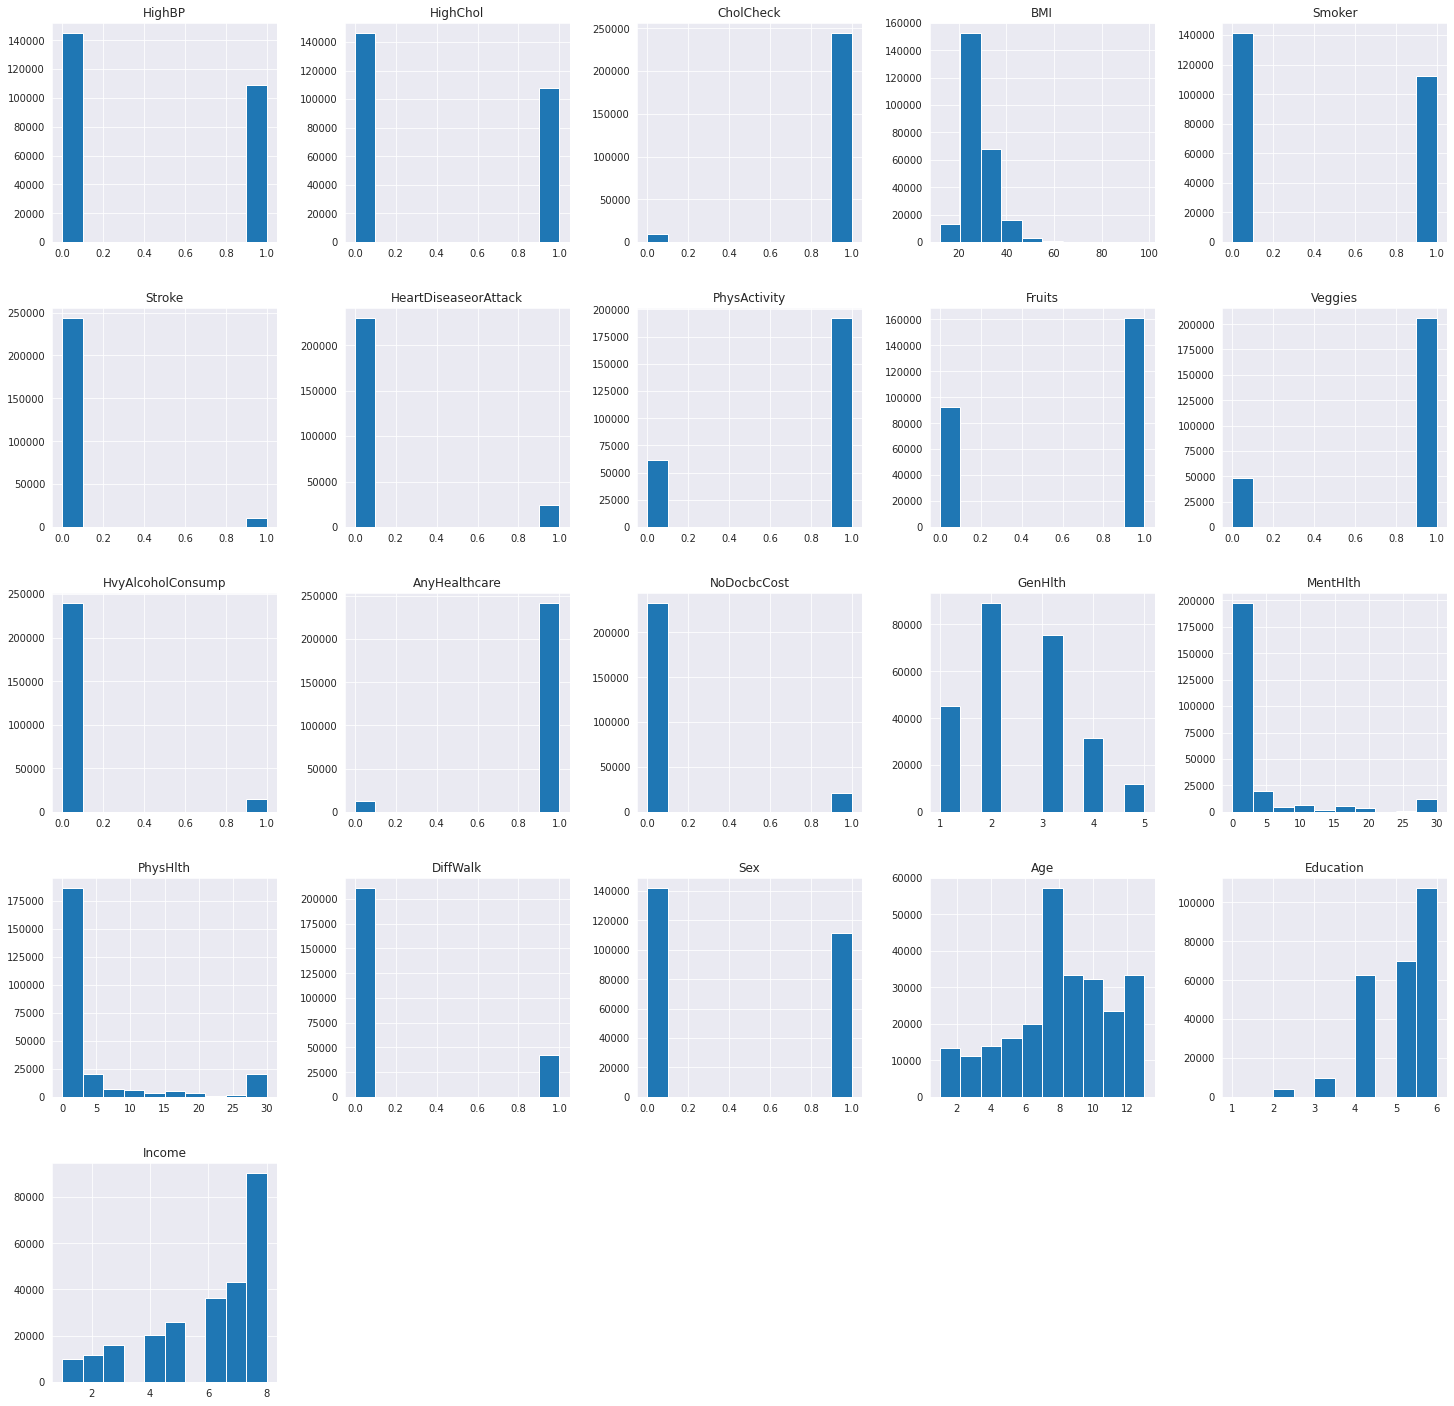

In [ ]:
#@title Histogramas del dataset sin normalización 
plt.rcParams['figure.figsize'] = [25, 25];
# Dibujar histogramas de todos los atributos
dt.iloc[:,1:].hist()
plt.show()


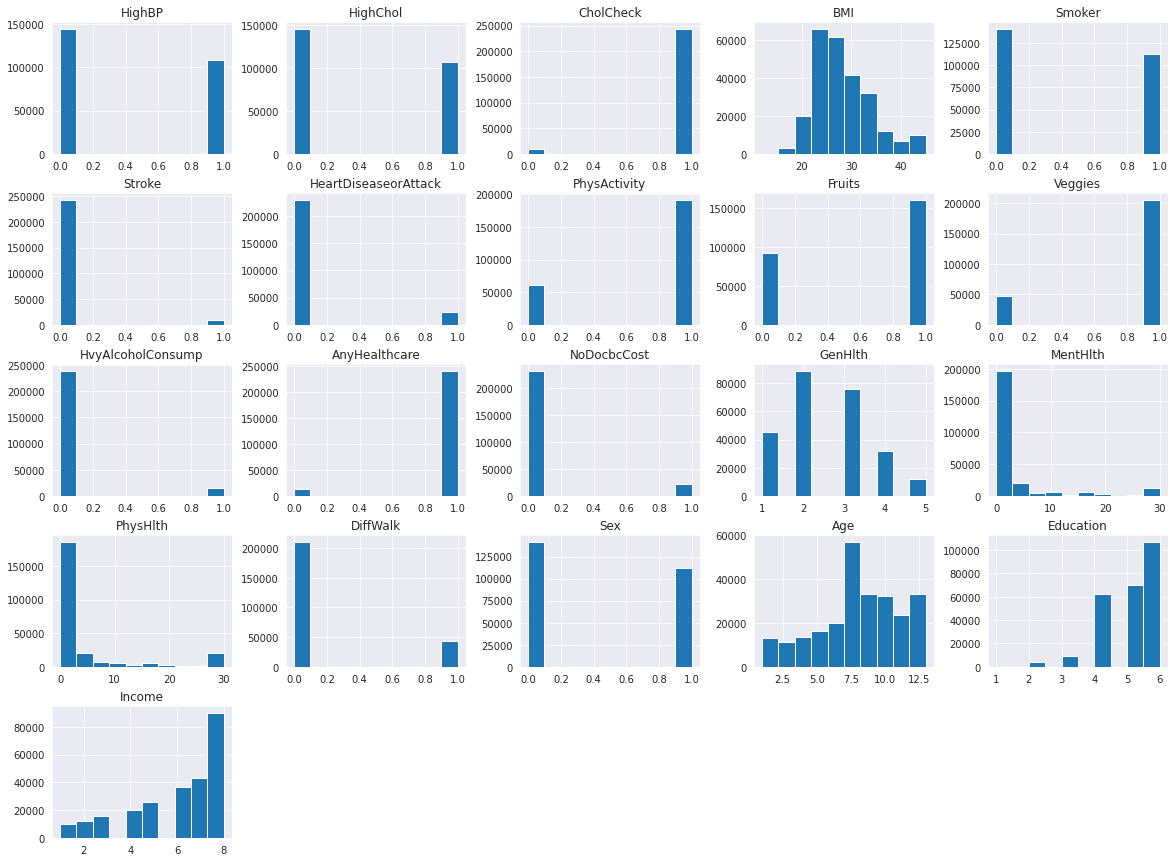

In [ ]:
#@title Histogramas del dataset normalizados
plt.rcParams['figure.figsize'] = [20, 15];
# Dibujar histogramas de todos los atributos
X_pre.hist()
plt.show()

#Relación de las variables

##Mapa de covarianza

In [ ]:
dt.columns.values

In [ ]:
import numpy as np
import random
from sklearn.preprocessing import StandardScaler

print(dt.var())
# dt.cov()

Diabetes_012             0.487427
HighBP                   0.244960
HighChol                 0.244243
CholCheck                0.035937
BMI                     43.674839
Smoker                   0.246771
Stroke                   0.038925
HeartDiseaseorAttack     0.085315
PhysActivity             0.184186
Fruits                   0.231976
Veggies                  0.153018
HvyAlcoholConsump        0.053039
AnyHealthcare            0.046552
NoDocbcCost              0.077091
GenHlth                  1.141644
MentHlth                54.950296
PhysHlth                76.002675
DiffWalk                 0.139925
Sex                      0.246442
Age                      9.328262
Education                0.971751
Income                   4.289652
dtype: float64


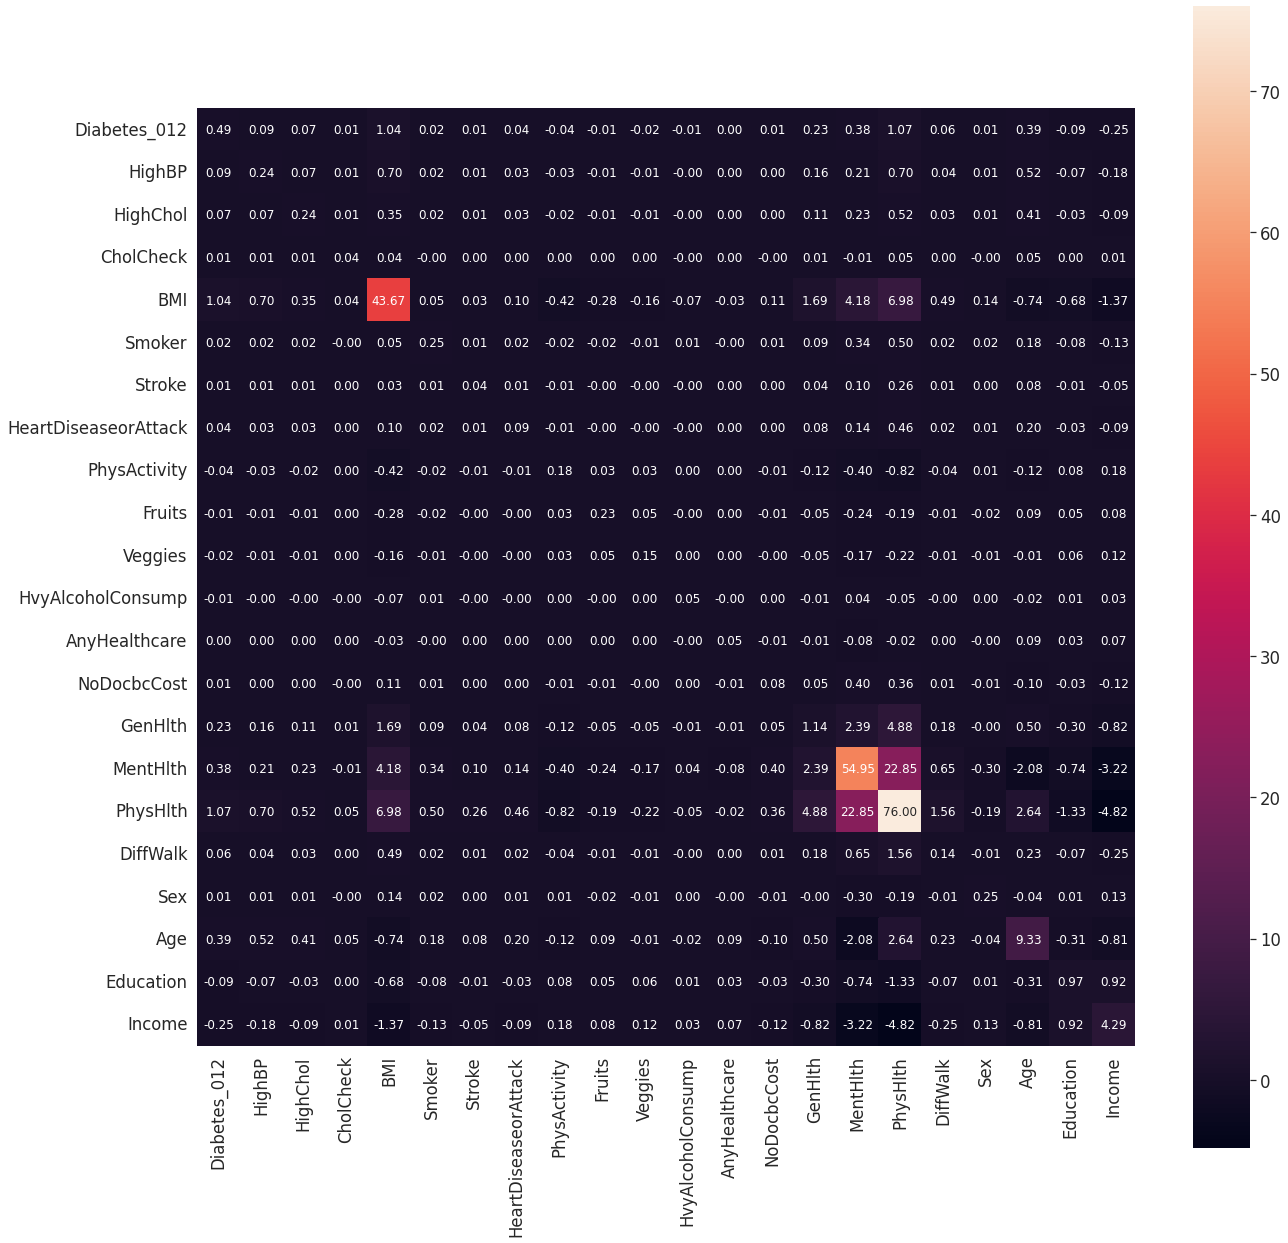

In [ ]:
# n = 50000
# a = random.randint(0, len(dt)-n)

covariance_matrix_dt = np.cov(dt.iloc[:,:].T)

plt.figure(figsize=(21,21))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix_dt,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
                 xticklabels=['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'])

In [ ]:
X_pre.iloc[:,:21].columns.values


array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

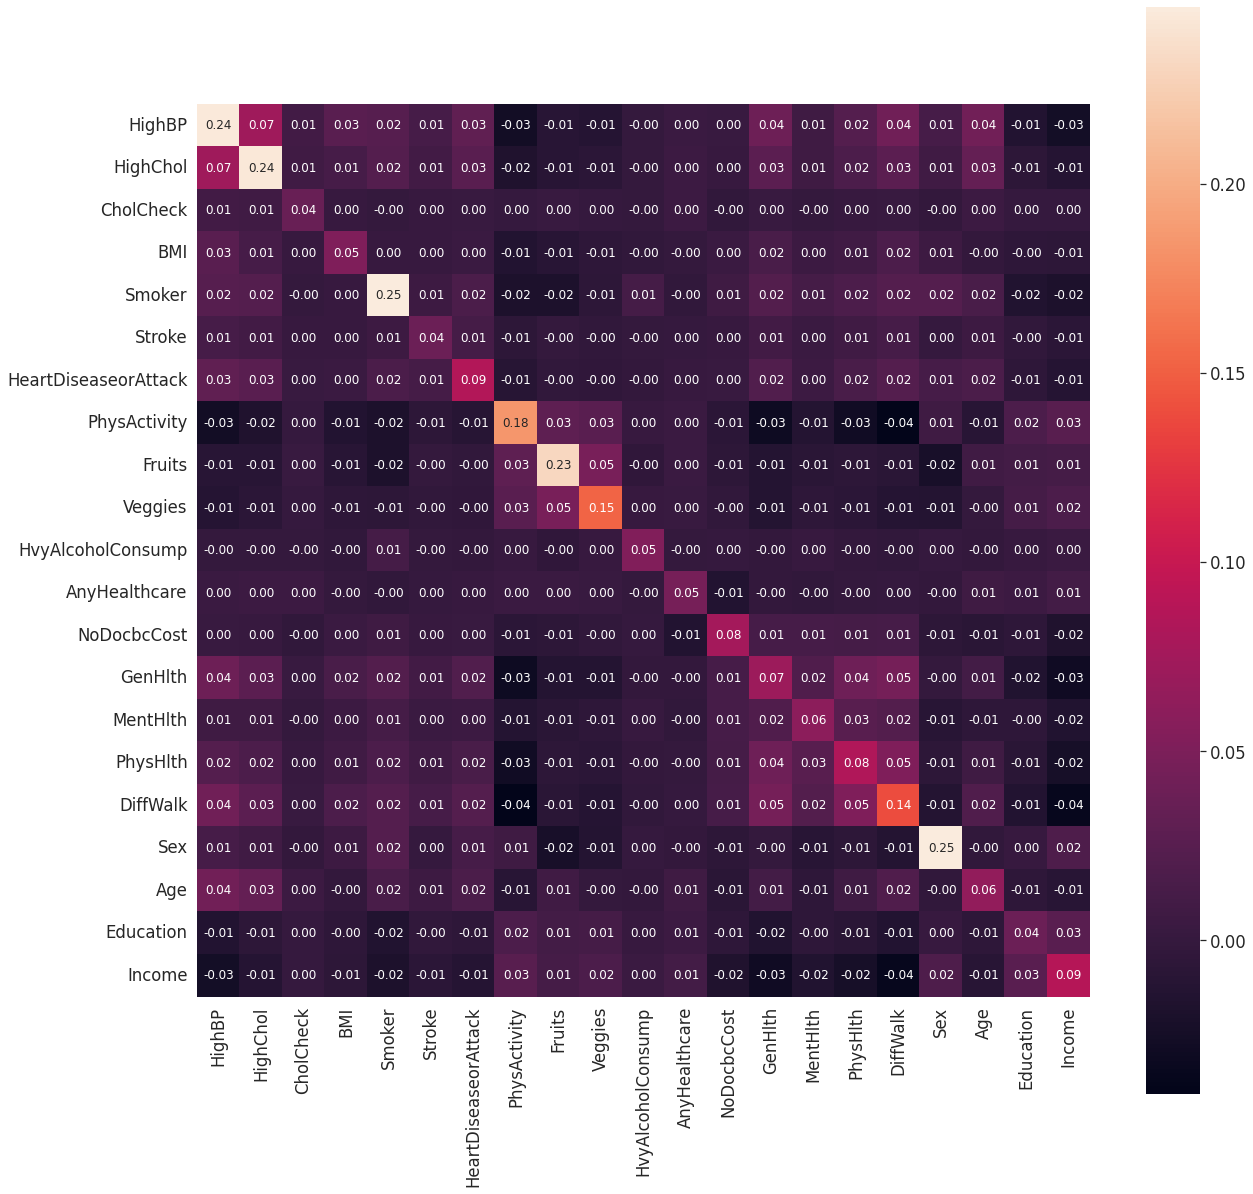

In [ ]:
X_pre_0_5 = X_pre.iloc[:,:21]


covariance_matrix_X_pre_0_5 = np.cov(X_pre_0_5.iloc[:,:].T)

plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix_X_pre_0_5,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
                 xticklabels=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'])

## Mapa correlacion


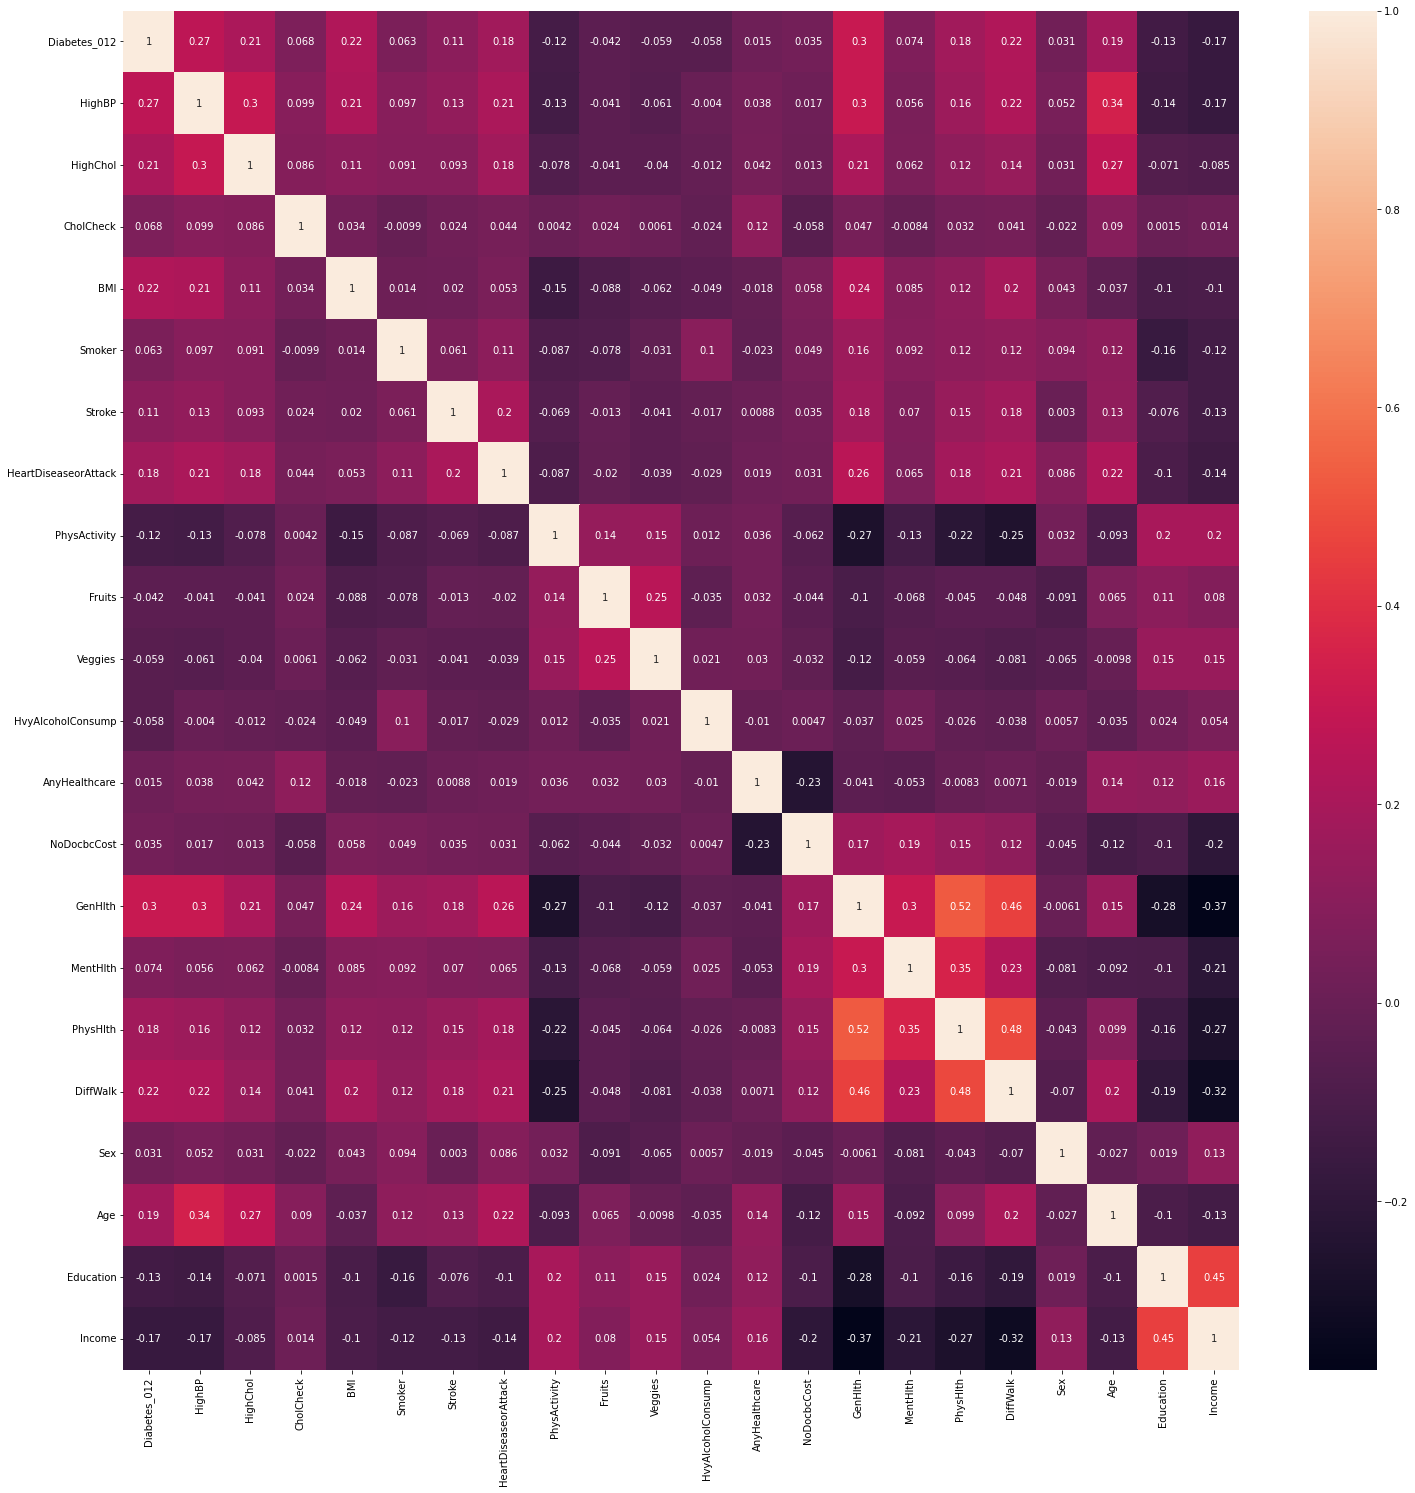

In [ ]:
corr = dt.corr() 
sns.heatmap(corr, annot = True) 


# Visualización de datos 

## Visualización de datos NO **balanceados**

 
 Número de datos No diabeticos: 213703 - Porcentaje: %84.24116997792494
 Número de datos Pre diabeticos: 4631 - Porcentaje: %1.8255282245348472
 Número de datos Diabeticos: 35346 - Porcentaje: %13.933301797540206
 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


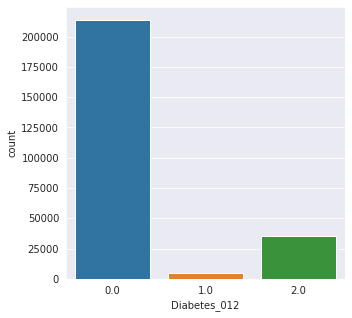

In [ ]:
plt.figure(figsize = (5, 5))
sns.set_style("darkgrid")
sns.countplot(dt_copy["Diabetes_012"])

print (f" ")
print (f" Número de datos No diabeticos: {datos_tipo_0.shape [0]} - Porcentaje: %{datos_tipo_0.shape [0] / dt_copy.shape [0]*100}")
print (f" Número de datos Pre diabeticos: {datos_tipo_1.shape [0]} - Porcentaje: %{datos_tipo_1.shape [0] / dt_copy.shape [0]*100}")
print (f" Número de datos Diabeticos: {datos_tipo_2.shape [0]} - Porcentaje: %{datos_tipo_2.shape [0] / dt_copy.shape [0]*100}")
print (f" ")


## BALANCEO DE DATOS
SE DEBE BALANCEAR LOS DATOS PORQUE HAY MUCHOS DATOS DE LA CATEGORÍA DE TIPO 0 (No diabeticos), RESPECTO LAS CATEGORIAS TIPO 1 y TIPO 2 

In [ ]:
"""Código para hacer balanceo de datos"""

"Inicialización de los métodos de oversampling o sobremuestreo"
from imblearn.over_sampling import RandomOverSampler,SMOTE #para sobremostreo
#smote (sm). Genera nuevas muestras sintéticas.
#ROS. Duplica muestras de la clase menos representadas

#ROS
ros = RandomOverSampler()
#SMOTE
sm = SMOTE(random_state=21)

"Inicialización de los métodos de subsampling o submuestreo"
from imblearn.under_sampling import RandomUnderSampler, NearMiss # para submuestreo
#NearMiss (nm). Elimina las muestras más cercanas de la clase más representada
#RUS. Elimina muestras de la clase más representada aleatoriamente

#RUS
rus = RandomUnderSampler()
#NearMiss
nm = NearMiss()


In [ ]:
"Estrategia: SMOTE en la clase minoritaria 'Tipo 1' (Pre diabéticos) respecto a las clase 'Tipo 2' (Diabéticos), clase Tipo 0 queda igual"
#NearMiss (nm). Elimina las muestras más cercanas de la clase más representada
#RUS. Elimina muestras de la clase más representada aleatoriamente

# X_train_02 = np.concatenate((X_0, X_2), axis=0)
# Y_train_02 = np.concatenate((Y_0, Y_2), axis=0)
# X_train_02_sm, Y_train_02_sm = sm.fit_resample(X_train_02,Y_train_02)

# X_train_01 = np.concatenate((X_0, X_1), axis=0)
# Y_train_01 = np.concatenate((Y_0, Y_1), axis=0)
# X_train_01_sm, Y_train_01_sm = sm.fit_resample(X_train_01,Y_train_01)


# X_train_012 = np.concatenate((X_train_01_sm, X_train_02_sm), axis=0)
# Y_train_012 = np.concatenate((Y_train_01_sm, Y_train_02_sm), axis=0)

# print(f"X_train_012 {X_train_012.shape} Y_train_012 {Y_train_012.shape}")
# print(Counter(Y_train_012).keys())
# print(Counter(Y_train_012).values())

"Estrategia: Subsampling RUS X_0 ,X_2"
#NearMiss (nm). Elimina las muestras más cercanas de la clase más representada
#RUS. Elimina muestras de la clase más representada aleatoriamente


# X_train_02 = np.concatenate((X_0, X_2), axis=0)
# Y_train_02 = np.concatenate((Y_0, Y_2), axis=0)
# X_train_02_rus, Y_train_02_rus = rus.fit_resample(X_train_02,Y_train_02)

# X_train_012 = np.concatenate((X_train_02_rus, X_1), axis=0)
# Y_train_012 = np.concatenate((Y_train_02_rus, Y_1), axis=0)

# print (f"X_train_012 {X_train_012.shape} Y_train_012 {Y_train_012.shape}")
# print(Counter(Y_train_012).keys())
# print(Counter(Y_train_012).values())

"Estrategia: Subsampling  X_0/4.3 , Oversampling X_2*1.5, se dej[o igual X_1"
#NearMiss (nm). Elimina las muestras más cercanas de la clase más representada
#RUS. Elimina muestras de la clase más representada aleatoriamente


X_0_mitad = X_0[:int(len(X_0)/3)]
Y_0_mitad = Y_0[:int(len(Y_0)/3)]

X_2_1 = X_2[0:int(len(X_2)/2)]
Y_2_1 = Y_2[0:int(len(Y_2)/2)]
X_2_1_1 = np.concatenate((X_2_1, X_2, X_1), axis=0)
Y_2_1_1 = np.concatenate((Y_2_1, Y_2, Y_1), axis=0)

X_train_012 = np.concatenate((X_0_mitad, X_2_1_1), axis=0)
Y_train_012 = np.concatenate((Y_0_mitad, Y_2_1_1), axis=0)

print (f"X_train_012 {X_train_012.shape} Y_train_012 {Y_train_012.shape}")
print(Counter(Y_train_012).keys())
print(Counter(Y_train_012).values())

"Estrategia: Subsampling RUS X_0,X_1,X_2"
#NearMiss (nm). Elimina las muestras más cercanas de la clase más representada
#RUS. Elimina muestras de la clase más representada aleatoriamente

# X_train_02_nm = np.concatenate((X_0, X_1, X_2), axis=0)
# Y_train_02_nm = np.concatenate((Y_0, Y_1, Y_2), axis=0)
# X_train_012, Y_train_012 = rus.fit_resample(X_train_02_nm,Y_train_02_nm)

# print (f"X_train_012 {X_train_012.shape} Y_train_012 {Y_train_012.shape}")
# print (Counter(Y_train_012).keys())
# print (Counter(Y_train_012).values())


X_train_012 (122438, 21) Y_train_012 (122438,)
dict_keys([0.0, 2.0, 1.0])
dict_values([67672, 50367, 4399])


'Estrategia: Subsampling RUS X_0,X_1,X_2'

## Visualización de datos **balanceados**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


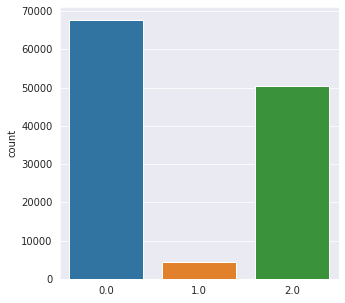

In [ ]:
plt.figure(figsize = (5, 5))
sns.set_style("darkgrid")
sns.countplot(Y_train_012)


## Histogramas del dataset

In [ ]:
p = pd.DataFrame(X_train_012)

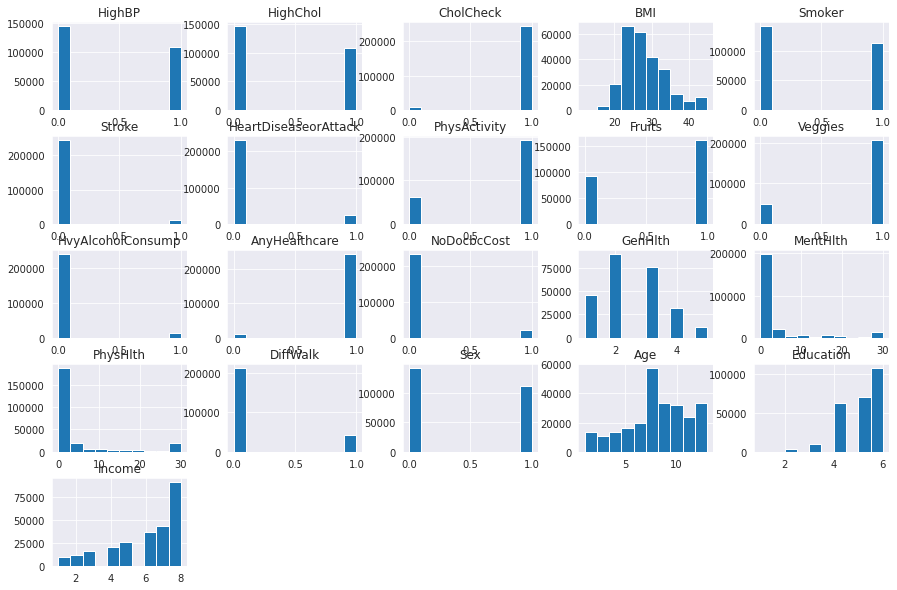

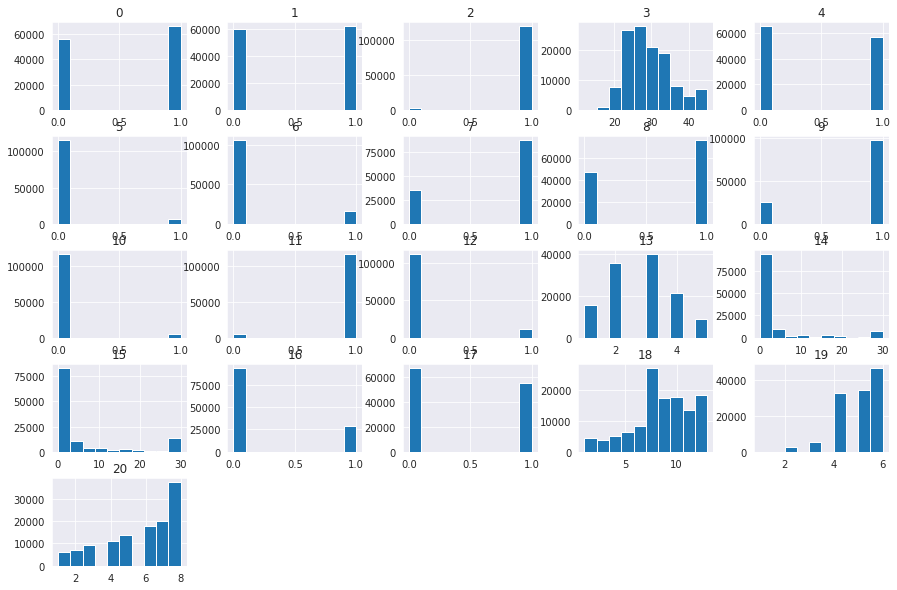

In [ ]:

plt.rcParams['figure.figsize'] = [15, 10];
# Dibujar histogramas de todos los atributos
dt_copy.iloc[:,1:].hist()
p.hist()
plt.show()

In [ ]:
p.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,1.0,38.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,4.0,5.0,0.0,0.0,5.0,6.0,7.0
1,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,1.0,2.0,0.0,1.0,8.0,6.0,8.0
2,1.0,0.0,1.0,24.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,2.0
3,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,5.0,3.0
4,0.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,5.0,8.0


# **Creación de datos de entreno y de test - División aleatoria con train_test_split()**

In [ ]:
# "se ejecuta esto si no se quiere trabajar con datos balanceados"
# X_train_012 = np.concatenate((X_0, X_1, X_2), axis=0)
# Y_train_012 = np.concatenate((Y_0, Y_1, Y_2), axis=0)

In [ ]:
"""se crean datos de train, validation y test para cada grupo: No diabeticos, Pre diabeticso y Diabeticos"""
"""los datos de train y validation se utilizarán para entrenar y probar cada modelo"""
"""los datos de test se utilizarán para realizar pruebas una vez se tenga el modelo"""

"esta opcion siguientes las desarrollamos de acuerdo con las tecnicas de oversampling o subsampling utilizadas anteriormente"
X_train, X_val, Y_train, Y_val = train_test_split(X_train_012, Y_train_012, test_size=0.30, random_state=21)


"se imprimen los datos para cada grupo: No diabeticos, Pre diabeticso y Diabeticos"

print(f"X_train {X_train.shape}")
print(f"Y _train {Y_train.shape}")
print(f"X_val {X_val.shape}")
print(f"Y _val {Y_val.shape}")

print(f"Y_train {Counter(Y_train).keys()}")
print(f"Y_train {Counter(Y_train).values()}")
print(f"Y_val {Counter(Y_val).keys()}")
print(f"Y_val {Counter(Y_val).values()}")



X_train (85706, 21)
Y _train (85706,)
X_val (36732, 21)
Y _val (36732,)
Y_train dict_keys([0.0, 2.0, 1.0])
Y_train dict_values([47433, 35173, 3100])
Y_val dict_keys([2.0, 0.0, 1.0])
Y_val dict_values([15194, 20239, 1299])


# CREACIÓN MODELO DE RED NEURONAL

Creación modelo de Red Neuronal una para todos los datos


In [ ]:
"se han creado varios modelos para la red neuronal cada uno presenta los resultados en la parte superior"
# # # ###MODEL 1
# model1 = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(21,)),
#   tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)),
#   tf.keras.layers.Dropout(0.3),
#   tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)),
#   tf.keras.layers.Dropout(0.3),
#   tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#   tf.keras.layers.Dropout(0.3),
#   tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)),
#   tf.keras.layers.Dropout(0.3),
#   tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#   tf.keras.layers.Dropout(0.3),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(3, activation='softmax')
#   ])

# # #MODEL 2
# model1 = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(21,)),
#   tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)),
#   tf.keras.layers.Dropout(0.3),
#   tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#   tf.keras.layers.Dropout(0.3),
#   tf.keras.layers.Dense(3, activation='softmax')
# ])

# # # # # #MODEL 3
# model1 = tf.keras.models.Sequential()
# model1.add(layers.Input(X_train.shape[1:]))
# model1.add(layers.Dense(150,activation='relu'))
# model1.add(layers.Dense(150,activation='relu'))
# model1.add(layers.Flatten())
# model1.add(layers.Dense(3,activation='softmax'))

# # #MODEL 4
# model1 = tf.keras.models.Sequential()
# model1.add(layers.Input(X_train.shape[1:]))
# model1.add(layers.Dense(21,activation='relu'))
# model1.add(layers.Dense(256,activation='relu'))
# model1.add(layers.Dense(256,activation='relu'))
# model1.add(layers.Dense(256,activation='relu'))
# model1.add(layers.Flatten())
# model1.add(layers.Dense(3,activation='softmax'))


# # # # #MODEL 4-0
model1 = tf.keras.models.Sequential()
model1.add(layers.Input(X_train.shape[1:]))
model1.add(layers.Dense(21, activation='relu',kernel_regularizer=regularizers.l1_l2(0.00001)))
model1.add(layers.Dense(21, activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model1.add(layers.Flatten())
model1.add(layers.Dense(3, activation='softmax'))


# # # # #MODEL 4-0A
# model1 = tf.keras.models.Sequential()
# model1.add(layers.Input(X_train.shape[1:]))
# model1.add(layers.Dense(21, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
# model1.add(layers.Dropout(0.1))
# model1.add(layers.Dense(21, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
# model1.add(layers.Dropout(0.1))
# model1.add(layers.Dense(21, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
# model1.add(layers.Dropout(0.1))
# model1.add(layers.Flatten())
# model1.add(layers.Dense(3, activation='softmax'))



# # # # #MODEL 4-1
# model1 = tf.keras.models.Sequential()
# model1.add(layers.Input(X_train.shape[1:]))
# model1.add(layers.Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
# model1.add(layers.Dropout(0.3))
# model1.add(layers.Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
# model1.add(layers.Dropout(0.3))
# model1.add(layers.Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
# model1.add(layers.Dropout(0.3))
# model1.add(layers.Dense(3,activation='softmax'))

# #MODEL 4-2
# model1 = tf.keras.models.Sequential()
# model1.add(layers.Input(X_train.shape[1:]))
# model1.add(layers.Dense(256,activation='sigmoid',  kernel_regularizer=regularizers.l1_l2(0.00001)))
# model1.add(layers.Dense(128,activation='sigmoid',  kernel_regularizer=regularizers.l1_l2(0.00001)))
# model1.add(layers.Dense(3,activation='softmax'))

# # # #MODEL 5
# model1 = tf.keras.models.Sequential()
# model1.add(layers.Input(X_train.shape[1:]))
# model1.add(layers.Dense(256,activation='sigmoid', kernel_regularizer=regularizers.l1_l2(0.001)))
# model1.add(layers.Dropout(0.2))
# model1.add(layers.Dense(256,activation='sigmoid', kernel_regularizer=regularizers.l1_l2(0.001)))
# model1.add(layers.Dropout(0.2))
# model1.add(layers.Dense(256,activation='sigmoid', kernel_regularizer=regularizers.l1_l2(0.001)))
# model1.add(layers.Flatten())
# model1.add(layers.Dense(3,activation='softmax'))

# # # # # #MODEL 6
# model1 = tf.keras.models.Sequential()
# model1.add(layers.Input(X_train.shape[1:]))
# model1.add(layers.Dense(256,activation='relu'))
# model1.add(layers.Dense(256,activation='relu'))
# model1.add(layers.Flatten())
# model1.add(layers.Dense(3,activation='softmax'))

# # ## MODEL 7 - Julio
# model1 = tf.keras.models.Sequential()
# model1.add(layers.Input(X_train.shape[1:]))
# model1.add(layers.Dense(460,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
# model1.add(layers.Dropout(0.3))
# model1.add(layers.Dense(211,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
# model1.add(layers.Dropout(0.2))
# model1.add(layers.Dense(21,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
# model1.add(layers.Dropout(0.1))
# model1.add(layers.Flatten())
# model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
# model1.summary()


In [ ]:
epocas=300

callback_early = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience=3, mode = "auto")

In [ ]:
"""se entrena el modelo"""
history1 = model1.fit(X_train,Y_train,
                   epochs=epocas,
                   batch_size=1024,
                   callbacks = [callback_early],
                   validation_data=(X_val,Y_val))


Epoch 1/300
84/84 [==============================] - 1s 9ms/step - loss: 1.2856 - accuracy: 0.5436 - val_loss: 0.9370 - val_accuracy: 0.6357
Epoch 2/300
84/84 [==============================] - 0s 4ms/step - loss: 0.8893 - accuracy: 0.6551 - val_loss: 0.8470 - val_accuracy: 0.6660
Epoch 3/300
84/84 [==============================] - 0s 4ms/step - loss: 0.8130 - accuracy: 0.6849 - val_loss: 0.7858 - val_accuracy: 0.6893
Epoch 4/300
84/84 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.7017 - val_loss: 0.7502 - val_accuracy: 0.7062
Epoch 5/300
84/84 [==============================] - 0s 4ms/step - loss: 0.7401 - accuracy: 0.7111 - val_loss: 0.7289 - val_accuracy: 0.7117
Epoch 6/300
84/84 [==============================] - 0s 4ms/step - loss: 0.7243 - accuracy: 0.7137 - val_loss: 0.7148 - val_accuracy: 0.7148
Epoch 7/300
84/84 [==============================] - 0s 4ms/step - loss: 0.7113 - accuracy: 0.7160 - val_loss: 0.7057 - val_accuracy: 0.7165
Epoch 8/300
8

## Desempeño del modelo

In [ ]:
"""# Evaluamos el modelo usando datos de test"""

X_test = np.concatenate((X_test_0, X_test_1, X_test_2), axis=0)
Y_test = np.concatenate((Y_test_0, Y_test_1, Y_test_2), axis=0)
model1.evaluate(X_test, Y_test, verbose=2)
# hypermodel.evaluate(X_test, Y_test, verbose=2)

397/397 - 1s - loss: 0.5595 - accuracy: 0.7431 - 643ms/epoch - 2ms/step


[0.5594932436943054, 0.7431026101112366]

# RESULTADO DE LA PREDICCIÓN DE LA RED NEURONAL CON DATOS REALES


In [ ]:
# """testeo multiples registros con la data de test"""

clasification_0 = model1.predict(X_test_0)
clasification_1 = model1.predict(X_test_1)
clasification_2 = model1.predict(X_test_2)

# clasification_0 = hypermodel.predict(X_test_0)
# clasification_1 = hypermodel.predict(X_test_1)
# clasification_2 = hypermodel.predict(X_test_2)


a_0 = []
for i in range(0,len(clasification_0)):
  a_0.append(np.where(clasification_0[i] == max(clasification_0[i])))
a_0 = np.array(a_0)

a_1 = []
for i in range(0,len(clasification_1)):
  a_1.append(np.where(clasification_1[i] == max(clasification_1[i])))
a_1 = np.array(a_1)

a_2 = []
for i in range(0,len(clasification_2)):
  a_2.append(np.where(clasification_2[i] == max(clasification_2[i])))
a_2 = np.array(a_2)


# resultado_clasification = a.ravel().tolist()
resultado_clasification_0 = a_0.ravel().tolist()
resultado_clasification_1 = a_1.ravel().tolist()
resultado_clasification_2 = a_2.ravel().tolist()


print(" ")
# print(set(resultado_clasification)) #para ver valores unicos
print(f"NO diabeticos {X_test_0.shape[0]}")
print(Counter(resultado_clasification_0).keys())
# print(Counter(resultado_clasification_0).values())
m0=Counter(resultado_clasification_0)
k00=(list(m0.values())[0])
k01=(list(m0.values())[1])
# k02=(list(m0.values())[2])
s0=X_test_0.shape[0]
# print(f"%{round(((k00/s0)*100), 2)} - %{round(((k01/s0)*100), 2)} - %{round(((k02/s0)*100), 2)} ")
print(f"%{round(((k00/s0)*100), 2)} - %{round(((k01/s0)*100), 2)}")


print(" ")
print(f"Pre diabeticos {X_test_1.shape[0]}")
print(Counter(resultado_clasification_1).keys())
# print(Counter(resultado_clasification_1).values())
m1=Counter(resultado_clasification_1)
k10=(list(m1.values())[0])
k11=(list(m1.values())[1])
# k12=(list(m1.values())[2])
s1=X_test_1.shape[0]
# print(f"%{round(((k10/s1)*100), 2)} - %{round(((k11/s1)*100), 2)} - %{round(((k12/s1)*100), 2)}")
print(f"%{round(((k10/s1)*100), 2)} - %{round(((k11/s1)*100), 2)} ")


print(" ")
print(f"Diabeticos {X_test_2.shape[0]}")
print(Counter(resultado_clasification_2).keys())
# print(Counter(resultado_clasification_2).values())
m2=Counter(resultado_clasification_2)
k20=(list(m2.values())[0])
k21=(list(m2.values())[1])
# k22=(list(m2.values())[2])
s2=X_test_2.shape[0]
# print(f"%{round(((k20/s2)*100), 2)} -  %{round(((k21/s2)*100), 2)} -  %{round(((k22/s2)*100), 2)}")
print(f"%{round(((k20/s2)*100), 2)} -  %{round(((k21/s2)*100), 2)} ")


56/56 [==============================] - 0s 1ms/step
 
NO diabeticos 10686
dict_keys([0, 2])
%75.87 - %24.13
 
Pre diabeticos 232
dict_keys([0, 2])
%40.09 - %59.91 
 
Diabeticos 1768
dict_keys([0, 2])
%25.4 -  %74.6 


In [ ]:
X_test_0.iloc[1221,:]

HighBP                   0.0
HighChol                 0.0
CholCheck                0.0
BMI                     25.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             0.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  5.0
MentHlth                 0.0
PhysHlth                30.0
DiffWalk                 0.0
Sex                      1.0
Age                     12.0
Education                4.0
Income                   7.0
Name: 14435, dtype: float64

In [ ]:
"""TESTEO registro individual"""
"clasificacion diabetico"
# datos = [1,1,1,25,1,0,0,1,0,0,0,1,0,2,0,0,0,1,12,5,7] # no Diabetico
# datos = [1,1,1,26,1,1,1,0,0,1,0,1,0,5,30,30,1,0,12,2,1] # diabetico [2]
# datos = [1,0,1,37,0,0,0,1,1,1,0,1,0,2,0,0,0,0,10,6,8] # No Diabetico - ahora Diabetico
# datos = [1,1,1,27,1,0,0,1,1,1,0,1,0,4,0,0,1,1,9,2,2] # diabetico [51]

"clasificacion NO diabetico"
datos = [1,1,1,27,1,0,0,0,0,0,0,1,1,2,0,0,0,0,10,4,1] #  diabetico
# datos = [0,0,1,21,0,0,0,1,1,1,0,1,0,2,0,0,0,0,9,6,8] # no diabetico
# datos = [0,1,1,24,0,0,0,0,1,1,0,1,0,2,0,0,0,1,10,6,8] # no diabetico


clasification = model1.predict([datos])  

n = clasification.ravel().tolist()
i = n.index(max(n)) 

if i==0:
  resultado_final = "No diabetico"
elif i==1:
  resultado_final = "Pre diabetico"
elif i==2:
  resultado_final = "Diabetico"

print(resultado_final)
print(clasification)
print(i)

1/1 [==============================] - 0s 54ms/step
Diabetico
[[0.38542858 0.05936892 0.5552025 ]]
2


#Grabamos y cargamos el modelo




In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Grabamos el modelo en el directorio
model1.save("model_diabetes.h5")

In [ ]:
"""TESTEO registro individualCON MODELO CARGADO"""
"clasificacion diabetico"
datos = [1,1,1,25,1,0,0,1,0,0,0,1,0,2,0,0,0,1,12,5,7] # no Diabetico - ahora Diabetico
# datos = [1,1,1,26,1,1,1,0,0,1,0,1,0,5,30,30,1,0,12,2,1] # diabetico [2]
# datos = [1,0,1,37,0,0,0,1,1,1,0,1,0,2,0,0,0,0,10,6,8] # No Diabetico - ahora Diabetico
# datos = [1,1,1,27,1,0,0,1,1,1,0,1,0,4,0,0,1,1,9,2,2] # diabetico [51]

"clasificacion NO diabetico"
# datos = [1,1,1,27,1,0,0,0,0,0,0,1,1,2,0,0,0,0,10,4,1] #  diabetico
# datos = [0,0,1,21,0,0,0,1,1,1,0,1,0,2,0,0,0,0,9,6,8] # no diabetico
# datos = [0,1,1,24,0,0,0,0,1,1,0,1,0,2,0,0,0,1,10,6,8] # no diabetico


clasification_cargada = model1_cargado.predict([datos])  

n_cargada = clasification_cargada.ravel().tolist()
i_cargada = n_cargada.index(max(n_cargada)) 

if i_cargada==0:
  resultado_final_cargada = "No diabetico"
elif i_cargada==1:
  resultado_final_cargada = "Pre diabetico"
elif i_cargada==2:
  resultado_final_cargada = "Diabetico"

print(resultado_final_cargada)
print(clasification_cargada)
print(i_cargada)

1/1 [==============================] - 0s 31ms/step
Diabetico
[[0.46541977 0.04493244 0.4896478 ]]
2
